# Libraries & Data Import

In [2]:
!pip install catboost
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.3 MB/s 


In [3]:
import numpy as np
import pandas as pd
import h5py
import shap
from matplotlib import pyplot
from tqdm import tqdm
from scipy import io
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print("Import Complete")

Import Complete


In [4]:
f = h5py.File('/content/drive/MyDrive/2. UOH - Applied Roots/2. UAV Project/Data/pub_dataset1.mat','r')
info_df = pd.DataFrame(np.array(f))
print(info_df)

         0
0        D
1        H
2  data_te
3  data_tr


In [5]:
# Extracing the Data, the Test and Train are Swapped as suggested by Mentor

def extracting_data(path):
  train_df = pd.DataFrame(h5py.File(path,'r')['data_te']).T
  test_df = pd.DataFrame(h5py.File(path,'r')['data_tr']).T
  print("Train Shape",train_df.shape)
  print("Test Shape",test_df.shape)
  print("-"*30)
  return train_df, test_df

tr_mat1,ts_mat1 = extracting_data('/content/drive/MyDrive/2. UOH - Applied Roots/2. UAV Project/Data/pub_dataset1.mat')
tr_mat2,ts_mat2 = extracting_data('/content/drive/MyDrive/2. UOH - Applied Roots/2. UAV Project/Data/pub_dataset2.mat')
tr_mat3,ts_mat3 = extracting_data('/content/drive/MyDrive/2. UOH - Applied Roots/2. UAV Project/Data/pub_dataset3.mat')
tr_mat4,ts_mat4 = extracting_data('/content/drive/MyDrive/2. UOH - Applied Roots/2. UAV Project/Data/pub_dataset4.mat')
tr_mat5,ts_mat5 = extracting_data('/content/drive/MyDrive/2. UOH - Applied Roots/2. UAV Project/Data/pub_dataset5.mat')
tr_mat6,ts_mat6 = extracting_data('/content/drive/MyDrive/2. UOH - Applied Roots/2. UAV Project/Data/pub_dataset6.mat')

Train Shape (17629, 55)
Test Shape (1751, 55)
------------------------------
Train Shape (15687, 55)
Test Shape (1569, 55)
------------------------------
Train Shape (5000, 55)
Test Shape (500, 55)
------------------------------
Train Shape (10600, 19)
Test Shape (1063, 19)
------------------------------
Train Shape (13513, 19)
Test Shape (1351, 19)
------------------------------
Train Shape (66, 19)
Test Shape (7, 19)
------------------------------


In [6]:
# Uni Directional
concat_uni_tr = [tr_mat4,tr_mat5,tr_mat6]
concat_uni_ts = [ts_mat4,ts_mat5,ts_mat6]
data_uni_tr = pd.concat(concat_uni_tr)
data_uni_ts = pd.concat(concat_uni_ts)

print("Uni Directional Train Data",data_uni_tr.shape)
print("Uni Directional Test Data",data_uni_ts.shape)

Uni Directional Train Data (24179, 19)
Uni Directional Test Data (2421, 19)


In [7]:
# Bi Directional
concat_bi_tr = [tr_mat1,tr_mat2,tr_mat3]
concat_bi_ts = [ts_mat1,ts_mat2,ts_mat3]
data_bi_tr = pd.concat(concat_bi_tr)
data_bi_ts = pd.concat(concat_bi_ts)

print("Bi Directional Train Data",data_bi_tr.shape)
print("Bi Directional Test Data",data_bi_ts.shape)

Bi Directional Train Data (38316, 55)
Bi Directional Test Data (3820, 55)


In [62]:
col_names = ["col_" + str(i) for i in range(1,56)]
print(col_names)

def data_column_assign(data,col_list):
  df = pd.DataFrame(data)
  df.columns = col_list
  return df

data_bi_tr = data_column_assign(data_bi_tr,col_names)
data_bi_ts = data_column_assign(data_bi_ts,col_names)

data_bi_tr.head(2)

['col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21', 'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28', 'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35', 'col_36', 'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42', 'col_43', 'col_44', 'col_45', 'col_46', 'col_47', 'col_48', 'col_49', 'col_50', 'col_51', 'col_52', 'col_53', 'col_54', 'col_55']


,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55
0,0.011144,0.010568,0.005403,0.005441,0.595357,-1.414428,0.027908,0.000473,0.015294,123.280702,...,193.21,280.154910,138.0,16.3086,2.973865,7.098149,1145.0,70.0,339.163692,1.0
1,0.009074,0.009746,0.004770,0.005561,0.817434,-0.945456,0.027311,0.000031,0.013160,102.565217,...,743.85,499.331682,1130.0,0.0000,-0.517908,-1.728870,1130.0,70.0,894.511951,1.0


In [63]:
data_bi_tr.head(2).to_csv('data.csv')

# EDA

In [9]:
df_vc = data_bi_tr['col_55'].value_counts().rename_axis('unique_values').reset_index(name='counts')

In [10]:
df_vc

,unique_values,counts
0,1.0,20137
1,0.0,18179


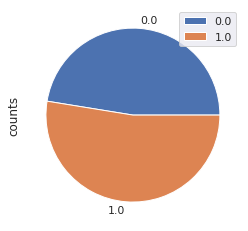

In [11]:
df_vc.groupby(['unique_values']).sum().plot(kind='pie', y='counts')

## Missing Value

In [12]:
# Missing Value Count
data_bi_tr.isna().sum()

col_1     0
col_2     0
col_3     0
col_4     0
col_5     0
col_6     0
col_7     0
col_8     0
col_9     0
col_10    0
col_11    0
col_12    0
col_13    0
col_14    0
col_15    0
col_16    0
col_17    0
col_18    0
col_19    0
col_20    0
col_21    0
col_22    0
col_23    0
col_24    0
col_25    0
col_26    0
col_27    0
col_28    0
col_29    0
col_30    0
col_31    0
col_32    0
col_33    0
col_34    0
col_35    0
col_36    0
col_37    0
col_38    0
col_39    0
col_40    0
col_41    0
col_42    0
col_43    0
col_44    0
col_45    0
col_46    0
col_47    0
col_48    0
col_49    0
col_50    0
col_51    0
col_52    0
col_53    0
col_54    0
col_55    0
dtype: int64

In [13]:
data_bi_ts.isna().sum()

col_1     0
col_2     0
col_3     0
col_4     0
col_5     0
col_6     0
col_7     0
col_8     0
col_9     0
col_10    0
col_11    0
col_12    0
col_13    0
col_14    0
col_15    0
col_16    0
col_17    0
col_18    0
col_19    0
col_20    0
col_21    0
col_22    0
col_23    0
col_24    0
col_25    0
col_26    0
col_27    0
col_28    0
col_29    0
col_30    0
col_31    0
col_32    0
col_33    0
col_34    0
col_35    0
col_36    0
col_37    0
col_38    0
col_39    0
col_40    0
col_41    0
col_42    0
col_43    0
col_44    0
col_45    0
col_46    0
col_47    0
col_48    0
col_49    0
col_50    0
col_51    0
col_52    0
col_53    0
col_54    0
col_55    0
dtype: int64

## Percentile Check

In [14]:
desc = data_bi_tr.describe(percentiles=[0.1 ,0.2,0.3,0.4, 0.50, 0.6,0.7,0.8 ,0.90,0.99])
desc

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55
count,38316.000000,38316.000000,3.831600e+04,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,...,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000
mean,1.795906,6.438853,1.042247e-01,0.132773,2.186626,6.987708,31.113541,0.081853,6.545611,281.444560,...,606.240038,474.715929,500.796221,145.109378,0.878229,2.359143,1369.122351,149.722701,776.473003,0.525551
std,32.599665,93.575582,3.245404e+00,4.666264,1.476072,9.001878,430.949287,3.516193,95.133826,285.044382,...,278.240315,201.576409,500.894038,220.369625,1.478191,8.318853,384.110426,76.665631,324.595695,0.499353
min,0.000142,0.000119,9.999999e-07,0.000000,-3.277994,-2.750000,0.000579,-0.000157,0.000237,64.175439,...,68.400000,1.798316,62.000000,0.000000,-5.966111,-2.019611,138.000000,61.000000,71.449983,0.000000
10%,0.003509,0.005326,5.743327e-04,0.000660,0.650315,-0.488289,0.020831,0.000005,0.006331,98.033333,...,266.765000,117.176307,138.000000,0.000000,-0.399589,-1.909644,810.000000,70.000000,308.642610,0.000000
20%,0.004770,0.007354,9.550000e-04,0.001108,0.938462,1.041991,0.023972,0.000008,0.008869,105.571429,...,357.320000,314.552300,150.000000,0.000000,-0.066280,-1.745346,1130.000000,76.000000,468.490790,0.000000
30%,0.007013,0.008727,1.372845e-03,0.001540,1.229923,1.992154,0.027811,0.000021,0.011733,116.326667,...,435.680000,400.622500,176.500000,17.791200,0.098193,-1.554121,1145.000000,76.000000,593.742292,0.000000
40%,0.009924,0.011614,1.961000e-03,0.002406,1.531424,2.587354,0.042461,0.000070,0.015801,125.040000,...,493.090000,450.536821,228.000000,19.273800,0.255627,-1.115251,1476.000000,76.000000,671.208738,0.000000
50%,0.012799,0.016859,2.770069e-03,0.003566,1.878002,3.511254,0.053542,0.000102,0.023179,143.518934,...,577.930000,510.717091,240.000000,56.338800,0.406873,0.386768,1586.000000,133.000000,789.283564,1.000000
60%,0.017240,0.028327,4.272000e-03,0.005540,2.268639,5.014097,0.118793,0.000119,0.032154,248.238095,...,664.640000,566.342285,288.000000,102.299400,0.631494,1.075666,1602.000000,216.000000,890.185295,1.000000


In [15]:
desc.to_csv("describe.csv")

In [16]:
data_bi_ts.describe(percentiles=[0.1 ,0.2,0.3,0.4, 0.50, 0.6,0.7,0.8 ,0.90,0.99])

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55
count,3820.000000,3820.000000,3.820000e+03,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,...,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000
mean,1.332478,5.323875,1.053956e-01,0.069902,2.177862,6.954766,28.332281,0.026375,5.405151,283.655126,...,604.312052,474.518646,493.121204,149.378160,0.894648,2.370409,1369.241885,150.578272,774.780764,0.518063
std,15.579214,65.289705,1.812016e+00,0.625769,1.477678,9.095396,368.018183,0.594549,65.412880,287.380691,...,277.500543,204.007224,491.915636,230.081989,1.476588,8.214460,387.839069,76.825446,325.622800,0.499739
min,0.000097,0.000047,9.999999e-07,0.000000,-2.624767,-2.750000,0.000160,0.000000,0.000108,64.666667,...,83.310000,4.757174,62.000000,0.000000,-5.235293,-2.019192,141.000000,61.000000,89.508435,0.000000
10%,0.003497,0.005148,5.138500e-04,0.000597,0.631754,-0.507390,0.020776,0.000005,0.006199,98.066667,...,266.031000,111.255645,138.000000,0.000000,-0.365513,-1.912075,788.500000,70.000000,303.203333,0.000000
20%,0.004774,0.007334,9.250490e-04,0.001083,0.956296,1.038266,0.023578,0.000008,0.008850,106.048355,...,354.724000,311.425551,150.000000,0.000000,-0.049841,-1.739595,1130.000000,76.000000,460.449072,0.000000
30%,0.007045,0.008672,1.349540e-03,0.001497,1.219927,1.979553,0.027787,0.000021,0.011696,117.031818,...,433.060000,398.783960,181.000000,17.791200,0.095713,-1.548580,1145.000000,76.000000,590.409923,0.000000
40%,0.009937,0.011586,1.926251e-03,0.002421,1.532319,2.582001,0.042336,0.000072,0.015865,125.894737,...,488.624000,451.009347,228.000000,19.273800,0.258991,-1.113763,1476.000000,76.000000,663.619174,0.000000
50%,0.012637,0.016799,2.796750e-03,0.003574,1.858385,3.534626,0.053482,0.000103,0.022811,143.724101,...,577.135000,510.599261,240.000000,57.821400,0.416053,0.397923,1594.000000,133.000000,783.001559,1.000000
60%,0.017156,0.029273,4.405600e-03,0.005623,2.212359,4.800392,0.118525,0.000119,0.032487,248.479406,...,664.290000,566.313194,285.800000,100.816800,0.625348,1.073640,1606.000000,216.000000,890.393098,1.000000


## Correlation

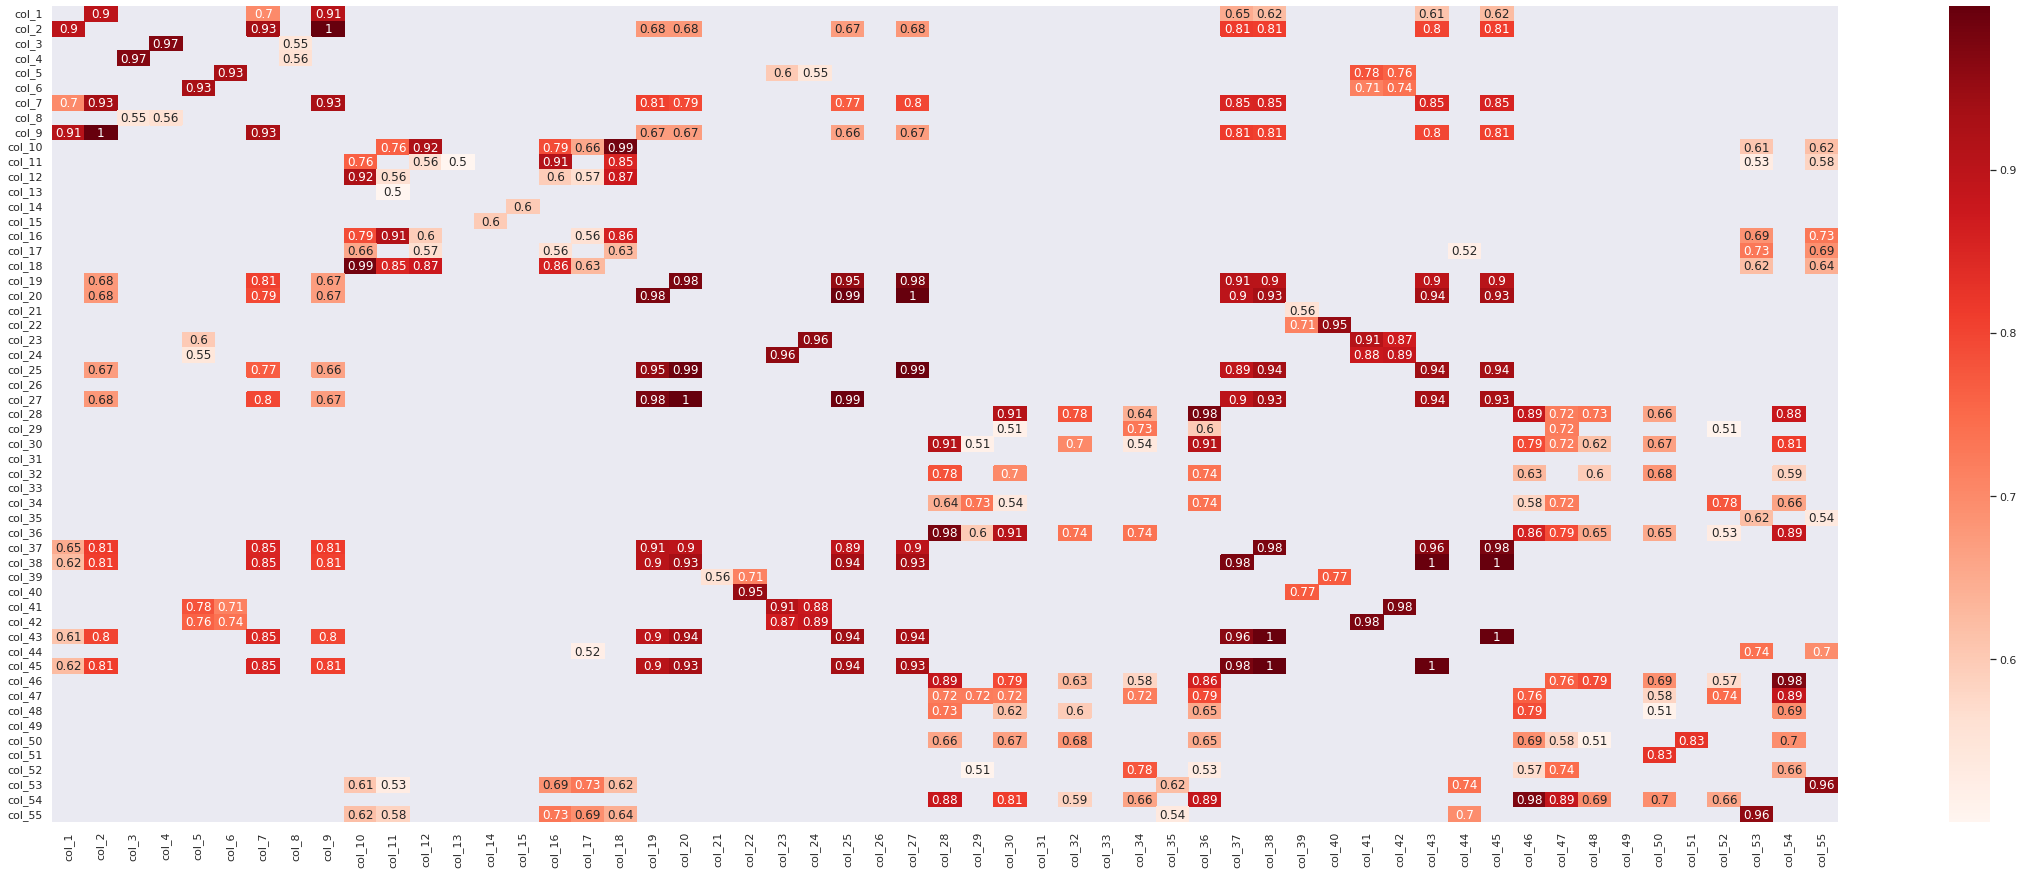

CPU times: user 7.18 s, sys: 517 ms, total: 7.7 s
Wall time: 11.3 s


In [17]:
# Refer  - https://www.kaggle.com/general/210058
%%time
# create correlation matrix with abs values
corr_matrix = data_bi_tr.corr().abs()

threshold = 0.5

filtered_corr_df = corr_matrix[(corr_matrix >= threshold) & (corr_matrix != 1.000)] 

plt.figure(figsize=(40,15))
sns.heatmap(filtered_corr_df, annot=True, cmap="Reds")
plt.show()

In [18]:
filtered_corr_df.to_csv("correlation.csv")

## Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a420ce210>,
      dtype=object)

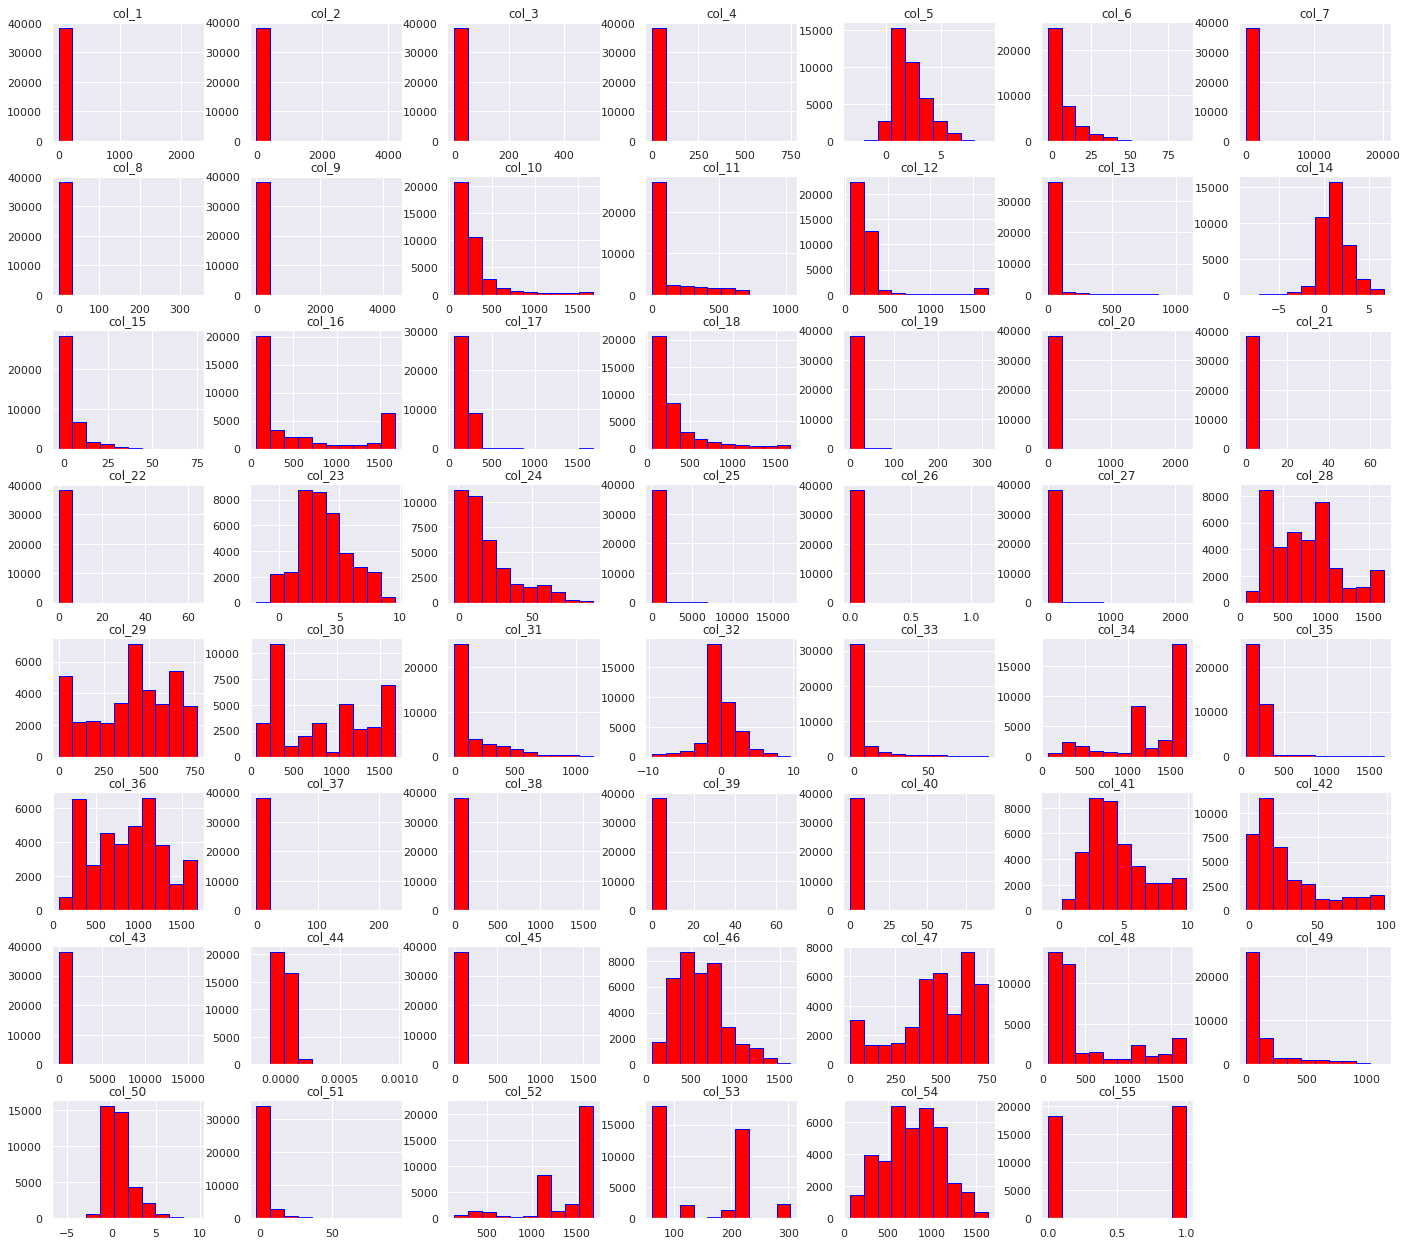

In [19]:
data_bi_tr.hist(figsize=(24,22),facecolor='red',edgecolor='blue')

## Anamoly Detection & Replacing with 99th or 1st Percentile Value

In [20]:
def anomaly_detect_pct(data):
    
    point_count = []
    pct_1 = np.round(np.percentile(data ,1),3)
    #print("1st percentile : ",pct_1)
    
    pct_99 = np.round(np.percentile(data ,99),3)
    #print("99th percentile : ",pct_99)


    # Generate outliers
    for i,data_point in enumerate(data):
        if (data_point > pct_99):
            point_count.append(1)
            data[i] = pct_99
            
        elif (data_point < pct_1):
            point_count.append(1)
            data[i] = pct_1

    x = sum(point_count)
    y = len(data)
    print("Outliers Detected in Percentage",round((x/y)*100,2))

In [21]:
for var in list(data_bi_tr.columns[0:54]):
    print(var)
    anomaly_detect_pct(data_bi_tr[var])

col_1
Outliers Detected in Percentage 2.4
col_2
Outliers Detected in Percentage 1.66
col_3
Outliers Detected in Percentage 0.98
col_4
Outliers Detected in Percentage 0.98
col_5
Outliers Detected in Percentage 1.95
col_6
Outliers Detected in Percentage 1.96
col_7
Outliers Detected in Percentage 2.04
col_8
Outliers Detected in Percentage 0.99
col_9
Outliers Detected in Percentage 1.46
col_10
Outliers Detected in Percentage 1.98
col_11
Outliers Detected in Percentage 1.96
col_12
Outliers Detected in Percentage 0.81
col_13
Outliers Detected in Percentage 0.98
col_14
Outliers Detected in Percentage 2.03
col_15
Outliers Detected in Percentage 1.92
col_16
Outliers Detected in Percentage 0.24
col_17
Outliers Detected in Percentage 0.98
col_18
Outliers Detected in Percentage 1.98
col_19
Outliers Detected in Percentage 0.99
col_20
Outliers Detected in Percentage 2.35
col_21
Outliers Detected in Percentage 0.99
col_22
Outliers Detected in Percentage 1.0
col_23
Outliers Detected in Percentage 1.95

In [22]:
data_bi_tr.describe(percentiles=[0.1 ,0.2,0.3,0.4, 0.50, 0.6,0.7,0.8 ,0.90,0.99])

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55
count,38316.000000,38316.000000,3.831600e+04,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,...,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000,38316.000000
mean,1.356709,4.688476,7.763555e-02,0.097963,2.209513,7.166963,22.095624,0.039117,4.786445,282.448394,...,598.346444,473.517204,494.851328,146.213978,0.881745,2.326268,1345.583464,149.782362,764.983816,0.525551
std,27.861921,76.521495,2.938170e+00,4.249322,1.505941,9.141478,349.266308,2.372471,78.044187,291.707584,...,285.895497,202.675523,499.758592,221.866373,1.489220,8.095872,412.829350,76.735548,335.295283,0.499353
min,0.000149,0.000119,9.999999e-07,0.000000,-3.277994,-2.750000,0.000579,-0.000157,0.000237,83.578947,...,108.702000,1.798316,86.000000,0.000000,-5.235293,-2.018186,181.000000,61.000000,114.847000,0.000000
10%,0.003307,0.005107,5.768500e-04,0.000664,0.646036,-0.531152,0.019857,0.000005,0.006161,97.300000,...,259.770000,109.014311,138.000000,0.000000,-0.422150,-1.921916,568.000000,70.000000,285.746046,0.000000
20%,0.004350,0.007183,9.569040e-04,0.001110,0.939516,1.008015,0.023151,0.000008,0.008635,102.933333,...,341.380000,313.286022,146.000000,0.000000,-0.075219,-1.769448,1110.000000,76.000000,436.780895,0.000000
30%,0.006597,0.008533,1.375770e-03,0.001543,1.232644,1.989603,0.027657,0.000021,0.011417,114.690079,...,429.390000,399.986967,172.000000,17.791200,0.094432,-1.581663,1134.000000,76.000000,586.843394,0.000000
40%,0.009553,0.011255,1.967000e-03,0.002415,1.537174,2.595544,0.039657,0.000070,0.015569,123.555556,...,484.070000,448.920239,228.000000,19.273800,0.252059,-1.199435,1448.000000,76.000000,654.180403,0.000000
50%,0.012463,0.016731,2.784750e-03,0.003576,1.886721,3.534900,0.051676,0.000102,0.022918,143.289229,...,566.180000,510.480509,240.000000,57.080100,0.404167,0.112092,1578.000000,133.000000,777.100347,1.000000
60%,0.017121,0.027914,4.305382e-03,0.005580,2.281894,5.065327,0.117810,0.000119,0.031505,247.178571,...,656.570000,565.368937,281.500000,102.299400,0.628078,1.070269,1602.000000,216.000000,880.980590,1.000000


# Model Build

## Data Split and Performance Metric

In [23]:
print("The Train Data",data_bi_tr.shape)
print("The Test Data",data_bi_ts.shape)

The Train Data (38316, 55)
The Test Data (3820, 55)


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix,classification_report, f1_score

def model_performance1(y_actual,y_pred):
    #Overall metrics
    accuracy =  accuracy_score(y_actual, y_pred)
    precision = precision_score(y_actual, y_pred, average='macro')
    recall =    recall_score(y_actual, y_pred, average='macro')
    F1_score =    recall_score(y_actual, y_pred, average='macro')
    
    print("Overall Accuracy : ",np.round(accuracy,2))
    print("Overall Precision : ",np.round(precision,2))
    print("Overall Recall : ",np.round(recall,2))
    print("Overall F1_score : ",np.round(F1_score,2))
    
    print("\n=== Confusion Matrix ===")
    print(confusion_matrix(y_actual, y_pred))
    print('\n')
    print("=== Classification Report ===")
    print(classification_report(y_actual, y_pred))
    print('\n')
    
    return {'accuracy' :np.round(accuracy,2) ,'precision' :np.round(precision,2) , 'recall':np.round(recall,2)}

In [25]:
import seaborn as sns

def confusion_matrix_fn(cf_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    
    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [26]:
import seaborn as sns
#refer - https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/

def confusion_matrix_(y_test, y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
    cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
    zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [27]:
def model_performance(y_actual,y_pred):
    print("    Classification Report:")
    print(classification_report(y_actual, y_pred))
          
    confusion_matrix_var = confusion_matrix(y_actual, y_pred)
    confusion_matrix_fn(confusion_matrix_var)

In [28]:
data_bi_tr['col_55'].value_counts()

1.0    20137
0.0    18179
Name: col_55, dtype: int64

In [29]:
vars = ['col_55']

cont_var = [var for var in data_bi_tr.columns if var not in vars]
print(cont_var)

['col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21', 'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28', 'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35', 'col_36', 'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42', 'col_43', 'col_44', 'col_45', 'col_46', 'col_47', 'col_48', 'col_49', 'col_50', 'col_51', 'col_52', 'col_53', 'col_54']


In [30]:
### Data Assigning

x_train = data_bi_tr[cont_var]
x_test = data_bi_ts[cont_var]
y_train = data_bi_tr['col_55']
y_test = data_bi_ts['col_55']

print("Train X Shape", x_train.shape,"and Y Shape",y_train.shape)
print("Test X Shape", x_test.shape,"and Y Shape",y_test.shape)

Train X Shape (38316, 54) and Y Shape (38316,)
Test X Shape (3820, 54) and Y Shape (3820,)


In [31]:
x_train.head(5)

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54
0,0.011144,0.010568,0.005403,0.005441,0.595357,-1.414428,0.027908,0.000473,0.015294,123.280702,...,0.011534,193.21,280.154910,138.0,16.3086,2.973865,7.098149,1145.0,70.0,339.163692
1,0.009074,0.009746,0.004770,0.005561,0.817434,-0.945456,0.027311,0.000031,0.013160,102.565217,...,0.006255,743.85,499.331682,1130.0,0.0000,-0.517908,-1.728870,1130.0,70.0,894.511951
2,0.010618,0.009797,0.007069,0.009864,0.458063,-1.428265,0.027570,0.000007,0.014343,99.937500,...,0.008107,567.72,514.805486,151.0,120.0906,0.168299,-1.971775,1130.0,70.0,764.643996
3,0.006668,0.008201,0.002745,0.003318,1.171704,-0.173755,0.026633,0.000009,0.010460,92.206897,...,0.005621,649.11,517.013801,1130.0,0.0000,-0.145954,-1.981538,1145.0,70.0,828.235492
4,0.009447,0.011816,0.005154,0.005924,2.325694,5.693968,0.052976,0.000005,0.014917,99.954545,...,0.006977,684.36,509.183790,1130.0,0.0000,-0.268890,-1.928930,1130.0,70.0,851.483447


## Applying Standard Scalar

In [53]:
np.seterr(divide = 'ignore') 

from sklearn.preprocessing import StandardScaler
def standard_tranform(df,var):
    # define scaler    
    scaler = StandardScaler()
    
    # transform data
    standard_var = scaler.fit_transform(df[var])
    standard_var_df = pd.DataFrame(standard_var, columns=var)
    
    return scaler,standard_var_df

In [54]:
# Normalise Indepedent Features
scaler,x_train_cont = standard_tranform(x_train,cont_var)

x_test_cont = scaler.transform(x_test[cont_var])
x_test_cont = pd.DataFrame(x_test_cont , columns=cont_var)

print("X-TRAIN : ",x_train_cont.shape,"\n",x_train_cont.head(10))

X-TRAIN :  (38316, 54) 
       col_1     col_2     col_3     col_4     col_5     col_6     col_7  \
0 -0.048295 -0.061133 -0.024585 -0.021774 -1.071872 -0.938744 -0.063184   
1 -0.048369 -0.061143 -0.024800 -0.021745 -0.924403 -0.887441 -0.063186   
2 -0.048314 -0.061143 -0.024018 -0.020733 -1.163042 -0.940257 -0.063185   
3 -0.048455 -0.061164 -0.025489 -0.022273 -0.689152 -0.803023 -0.063188   
4 -0.048356 -0.061116 -0.024669 -0.021660  0.077150 -0.161135 -0.063112   
5 -0.048659 -0.061258 -0.026423 -0.023053 -0.227529 -0.487545 -0.063247   
6 -0.048480 -0.061164 -0.025519 -0.022732 -0.271544 -0.587854 -0.063181   
7 -0.048452 -0.061152 -0.025505 -0.022461 -0.538602 -0.747691 -0.063184   
8 -0.048262 -0.061129 -0.023678 -0.020528 -1.215766 -0.955326 -0.063182   
9 -0.048410 -0.061142 -0.025741 -0.022372 -0.779048 -0.845353 -0.063185   

      col_8     col_9    col_10  ...    col_45    col_46    col_47    col_48  \
0 -0.016289 -0.061135 -0.545648  ... -0.071475 -1.417097 -0.954061 -0

In [56]:
#scaler.save_model('catboost_scaling_AP.json')

In [61]:
import joblib
joblib.dump(scaler, 'catboost_scaling_AP.bin', compress=True)

['catboost_scaling_AP.bin']

In [64]:
scaling_fn=joblib.load('/content/catboost_scaling_AP.bin')

In [65]:
tranf_data = scaling_fn.transform(x_train)

## Logistic OLS Model

In [34]:
import statsmodels.api as sm
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_test) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                 col_55   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              5024.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                        0.00
Time:                        19:30:17   Log-Likelihood:                         -1989.2
No. Observations:               38316   AIC:                                      4086.
Df Residuals:                   38262   BIC:                                      4548.
Df Model:                          54                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Basic Logistic Regression sk learn - Solver lbfgs

In [35]:
%%time
#importing and training the model
from sklearn.linear_model import LogisticRegression

lr_lbfgs = LogisticRegression(n_jobs=-1)
lr_lbfgs.fit(x_train,y_train)

CPU times: user 92.5 ms, sys: 99.9 ms, total: 192 ms
Wall time: 4.89 s


LogisticRegression(n_jobs=-1)

In [36]:
# Train
y_pred_ts = lr_lbfgs.predict(x_train)
model_performance1(y_train,  y_pred_ts)

Overall Accuracy :  0.96
Overall Precision :  0.96
Overall Recall :  0.96
Overall F1_score :  0.96

=== Confusion Matrix ===
[[17713   466]
 [ 1207 18930]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95     18179
         1.0       0.98      0.94      0.96     20137

    accuracy                           0.96     38316
   macro avg       0.96      0.96      0.96     38316
weighted avg       0.96      0.96      0.96     38316





{'accuracy': 0.96, 'precision': 0.96, 'recall': 0.96}

In [37]:
# Test
y_pred_ts = lr_lbfgs.predict(x_test)
model_performance1(y_test,  y_pred_ts)

Overall Accuracy :  0.96
Overall Precision :  0.96
Overall Recall :  0.96
Overall F1_score :  0.96

=== Confusion Matrix ===
[[1791   50]
 [  98 1881]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      1841
         1.0       0.97      0.95      0.96      1979

    accuracy                           0.96      3820
   macro avg       0.96      0.96      0.96      3820
weighted avg       0.96      0.96      0.96      3820





{'accuracy': 0.96, 'precision': 0.96, 'recall': 0.96}

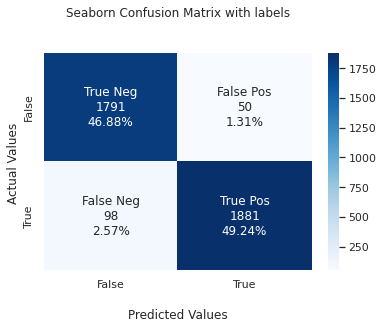

In [38]:
confusion_matrix_(y_test,  y_pred_ts)

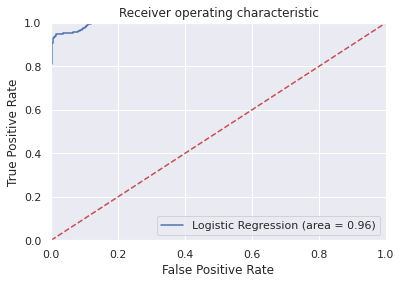

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Area under ROC Curve
logit_roc_auc = roc_auc_score(y_test,lr_lbfgs.predict(x_test))

# lr.predict_proba(x_test_pca)[:,1] gives the predicted prob for both classes in form of [0.34, 0.65]
# hence 1st element gives class-1 prob
fpr, tpr, thresholds = roc_curve(y_test, lr_lbfgs.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc="lower right")

#plt.savefig('Log_ROC')
plt.show()

## Basic Logistic Regression sk learn - Solver newton-cg

In [40]:
%%time
#importing and training the model
from sklearn.linear_model import LogisticRegression

lr_newton = LogisticRegression(solver='newton-cg', n_jobs=-1)
lr_newton.fit(x_train,y_train)

CPU times: user 387 ms, sys: 61.7 ms, total: 449 ms
Wall time: 38.9 s


LogisticRegression(n_jobs=-1, solver='newton-cg')

In [41]:
# Train
y_pred_ts = lr_newton.predict(x_train)
model_performance1(y_train,  y_pred_ts)

Overall Accuracy :  1.0
Overall Precision :  1.0
Overall Recall :  1.0
Overall F1_score :  1.0

=== Confusion Matrix ===
[[18179     0]
 [    0 20137]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18179
         1.0       1.00      1.00      1.00     20137

    accuracy                           1.00     38316
   macro avg       1.00      1.00      1.00     38316
weighted avg       1.00      1.00      1.00     38316





{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}

In [42]:
# Test
y_pred_ts = lr_newton.predict(x_test)
model_performance1(y_test,  y_pred_ts)

Overall Accuracy :  1.0
Overall Precision :  1.0
Overall Recall :  1.0
Overall F1_score :  1.0

=== Confusion Matrix ===
[[1841    0]
 [   0 1979]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1841
         1.0       1.00      1.00      1.00      1979

    accuracy                           1.00      3820
   macro avg       1.00      1.00      1.00      3820
weighted avg       1.00      1.00      1.00      3820





{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}

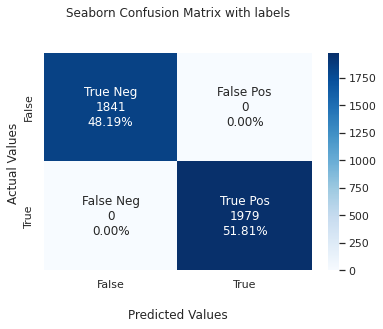

In [43]:
confusion_matrix_(y_test,  y_pred_ts)

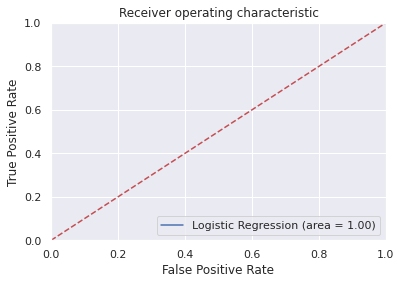

In [44]:
# Area under ROC Curve
logit_roc_auc = roc_auc_score(y_test,lr_newton.predict(x_test))

# lr.predict_proba(x_test_pca)[:,1] gives the predicted prob for both classes in form of [0.34, 0.65]
# hence 1st element gives class-1 prob
fpr, tpr, thresholds = roc_curve(y_test, lr_newton.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc="lower right")

#plt.savefig('Log_ROC')
plt.show()

## Cat Boost Classifier

In [51]:
cat_columns = []
for col in x_train.select_dtypes('object').columns:
    cat_columns.append(col)

cat_features_index = [i for i,col in enumerate(x_train.columns) if col in cat_columns]
NUM_OF_BOOST_ROUND = 10000
EARLY_STOPPING     = 200

SEED = 42

import random
import os

random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED']=str(SEED)

params = {
'cat_features': cat_features_index,
'eval_metric': 'Logloss',
'random_seed': SEED,
'n_estimators': NUM_OF_BOOST_ROUND,
}

cat_mdl = CatBoostClassifier(**params, early_stopping_rounds=EARLY_STOPPING)
cat_mdl.fit(x_train, y_train, eval_set=(x_test,y_test), plot=True, verbose=False)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [52]:
cat_mdl.save_model('catboost_model_AP.json')

In [46]:
# Train
y_pred_ts = cat_mdl.predict(x_train)
model_performance1(y_train,  y_pred_ts)


Overall Accuracy :  1.0
Overall Precision :  1.0
Overall Recall :  1.0
Overall F1_score :  1.0

=== Confusion Matrix ===
[[18179     0]
 [    0 20137]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18179
         1.0       1.00      1.00      1.00     20137

    accuracy                           1.00     38316
   macro avg       1.00      1.00      1.00     38316
weighted avg       1.00      1.00      1.00     38316





{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}

In [47]:
# Test
y_pred_ts = cat_mdl.predict(x_test)
model_performance1(y_test,  y_pred_ts)

Overall Accuracy :  1.0
Overall Precision :  1.0
Overall Recall :  1.0
Overall F1_score :  1.0

=== Confusion Matrix ===
[[1841    0]
 [   0 1979]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1841
         1.0       1.00      1.00      1.00      1979

    accuracy                           1.00      3820
   macro avg       1.00      1.00      1.00      3820
weighted avg       1.00      1.00      1.00      3820





{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}

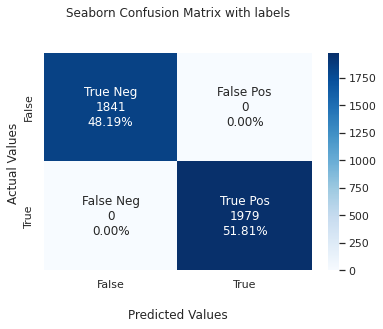

In [48]:
confusion_matrix_(y_test,  y_pred_ts)

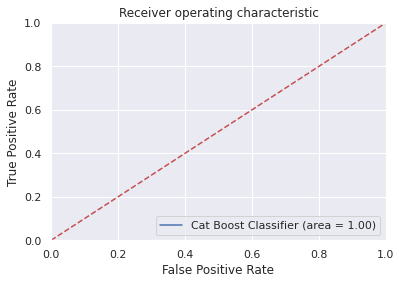

In [49]:
# Area under ROC Curve
logit_roc_auc = roc_auc_score(y_test,cat_mdl.predict(x_test))

# lr.predict_proba(x_test_pca)[:,1] gives the predicted prob for both classes in form of [0.34, 0.65]
# hence 1st element gives class-1 prob
fpr, tpr, thresholds = roc_curve(y_test, cat_mdl.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Cat Boost Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc="lower right")

#plt.savefig('Log_ROC')
plt.show()

# Variable Interpretation & Feature Importance

In [50]:
# Fits the explainer
explainer = shap.Explainer(cat_mdl.predict, x_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x_test)

Permutation explainer:  10%|█         | 383/3820 [01:10<11:24,  5.02it/s]


KeyboardInterrupt: ignored

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

In [ ]:
shap.plots.bar(shap_values)